# Kod źródłowy do projektu z przedmiotu Wprowadzenie do Sztucznej Inteligencji
### Marta Arendt 179990
### Maciej Mechliński 179965
### Michał Gąsecki 168191
### Stanisław Rachwał 180504

# Importy i ścieżka do bazy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'echocardiogram.csv'  # ŚCIEŻKA NA KOMPUTERZE 

# ŚCIEŻKI NA COLABIE
# Dodawanie indywidualnych części ścieżek jako zmienne, dokonanie konkatenacji, by otrzymać pełną ścieżkę do danych 
folders_sr = 'II stopień/WSI/echocardiogram.csv'
folders_ma = 'studia II stopień/WSI/echocardiogram.csv'
folders_mm = '/WSI_projekt/echocardiogram.csv'
# PATH = '/content/drive/MyDrive/' + folders_sr

# Eksploracja danych

In [3]:
df = pd.read_csv(PATH, na_values='?', on_bad_lines='skip', names=['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 'fractional_shortening', 
                                                   'epss', 'lvdd', 'wall_motion_score', 'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1'])

df = df.drop(['wall_motion_score', 'mult', 'name', 'group'], axis=1)
df.head(30)

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
0,11.00,0,71.000,0,0.260,9.000,4.600,1.000,0.0
1,19.00,0,72.000,0,0.380,6.000,4.100,1.700,0.0
2,16.00,0,55.000,0,0.260,4.000,3.420,1.000,0.0
3,57.00,0,60.000,0,0.253,12.062,4.603,1.450,0.0
4,19.00,1,57.000,0,0.160,22.000,5.750,2.250,0.0
5,26.00,0,68.000,0,0.260,5.000,4.310,1.000,0.0
6,13.00,0,62.000,0,0.230,31.000,5.430,1.875,0.0
7,50.00,0,60.000,0,0.330,8.000,5.250,1.000,0.0
8,19.00,0,46.000,0,0.340,0.000,5.090,1.140,0.0
9,25.00,0,54.000,0,0.140,13.000,4.490,1.190,0.0


In [4]:
df['alive_at_1'].value_counts()

0.0    50
1.0    24
Name: alive_at_1, dtype: int64

In [5]:
df.describe(include='all')

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
count,130.000000,131.000000,126.000000,131.000000,124.000000,117.000000,121.000000,130.00000,74.000000
mean,22.182923,0.328244,62.813722,0.183206,0.216734,12.164769,4.763157,1.37800,0.324324
std,15.858267,0.471377,8.342110,0.388320,0.107513,7.370159,0.810013,0.45185,0.471317
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,1.00000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,1.00000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,1.21600,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,1.50750,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,3.00000,1.000000


# Preprocessing

In [6]:
df_corrected = df.drop(df[(df['alive_at_1'] == 0 & (df['survival'] < 12))].index)

In [7]:
df_corrected.isnull().any()

survival                  True
still_alive              False
age_at_heart_attack       True
pericardial_effusion     False
fractional_shortening     True
epss                      True
lvdd                      True
wall_motion_index         True
alive_at_1                True
dtype: bool

In [8]:
print(f"NaN w SURVIVAL: {df_corrected['survival'].isna().sum()}")
print(f"NaN w STILL_ALIVE: {df_corrected['still_alive'].isna().sum()}")

NaN w SURVIVAL: 1
NaN w STILL_ALIVE: 0


In [9]:
df_wo_nan = df_corrected.dropna()

print(f'Wymiary danych wstępnie oczyszczonych: {df_corrected.shape}')
print(f'Wymiary danych po usunięciu NaN: {df_wo_nan.shape}')

Wymiary danych wstępnie oczyszczonych: (81, 9)
Wymiary danych po usunięciu NaN: (17, 9)


### Usunęło za dużo danych - potrzebne alternatywne podejście

In [10]:
#  Usunięcie wierszy, które mają NaN w SURVIVAL

df_droped_ssa = df_corrected.dropna(subset=['survival'])

df_droped_ssa.shape
df_droped_ssa.head(10)

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
10,10.00,1,77.000,0,0.13,16.000,4.23,1.800,1.0
14,0.50,1,62.000,0,0.12,23.000,5.80,2.330,1.0
16,0.50,1,69.000,1,0.26,11.000,4.65,1.640,1.0
17,0.50,1,62.529,1,0.07,20.000,5.20,2.000,1.0
19,1.00,1,66.000,1,0.22,15.000,5.40,2.250,1.0
20,0.75,1,69.000,0,0.15,12.000,5.39,1.625,1.0
21,0.75,1,85.000,1,0.18,19.000,5.46,1.380,1.0
22,0.50,1,73.000,0,0.23,12.733,6.06,1.500,1.0
23,5.00,1,71.000,0,0.17,0.000,4.65,1.000,1.0
24,48.00,0,64.000,0,0.19,5.900,3.48,1.110,NaN


In [11]:
df_droped_ssa.isnull().any()

survival                 False
still_alive              False
age_at_heart_attack       True
pericardial_effusion     False
fractional_shortening     True
epss                      True
lvdd                      True
wall_motion_index         True
alive_at_1                True
dtype: bool

# Podział danych na dyskretne i ciągłe (z uwzględnieniem wartości odstających)

In [12]:
discrete = ['pericardial_effusion']
continuous = df_droped_ssa.drop(['pericardial_effusion', 'still_alive', 'alive_at_1'], axis=1).columns
label = ['still_alive']

In [13]:
# for feature in continuous:
#     df_droped_ssa.boxplot(feature)
#     plt.title(feature)
#     plt.show()

In [14]:
df_droped_ssa.describe(include='all')

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
count,80.000000,80.000000,75.000000,80.000000,75.000000,71.000000,72.000000,79.000000,23.0
mean,16.753500,0.462500,62.767053,0.212500,0.201413,12.924690,4.849583,1.446684,1.0
std,14.566112,0.501737,8.667392,0.411658,0.100239,8.170525,0.859455,0.501228,0.0
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,1.000000,1.0
25%,1.000000,0.000000,58.500000,0.000000,0.140000,7.000000,4.360000,1.000000,1.0
50%,16.000000,0.000000,62.000000,0.000000,0.190000,11.800000,4.780000,1.360000,1.0
75%,31.000000,1.000000,67.000000,0.000000,0.260000,16.850000,5.360000,1.653500,1.0
max,48.000000,1.000000,86.000000,1.000000,0.500000,40.000000,6.780000,3.000000,1.0


In [15]:
outliers = ['wall_motion_index']

In [16]:
for feature in continuous:
    if feature in outliers:
        df_droped_ssa[feature].fillna(df_droped_ssa[feature].median(), inplace=True)
    else:
        df_droped_ssa[feature].fillna(df_droped_ssa[feature].mean(), inplace=True)

df_droped_ssa.drop(['alive_at_1'], axis=1, inplace=True)
df_droped_ssa.isna().any()

/tmp/ipykernel_28594/3017345712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droped_ssa[feature].fillna(df_droped_ssa[feature].mean(), inplace=True)
/tmp/ipykernel_28594/3017345712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droped_ssa[feature].fillna(df_droped_ssa[feature].median(), inplace=True)
/tmp/ipykernel_28594/3017345712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droped_ssa.drop(['alive_at_1'], 

survival                 False
still_alive              False
age_at_heart_attack      False
pericardial_effusion     False
fractional_shortening    False
epss                     False
lvdd                     False
wall_motion_index        False
dtype: bool

Wartości NaN dla kolumn zawierających wartości odstające zostają uzupełnione medianą, reszta średnią.

In [17]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(df_droped_ssa)

In [18]:
mask = outliers_rows != -1

df_droped_ssa.isnull().sum()

survival                 0
still_alive              0
age_at_heart_attack      0
pericardial_effusion     0
fractional_shortening    0
epss                     0
lvdd                     0
wall_motion_index        0
dtype: int64

# Podział danych na zbiory

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
df_droped_ssa = df_droped_ssa[mask]

In [21]:
df_final = pd.get_dummies(df_droped_ssa, columns = discrete, drop_first = True)
scaler = StandardScaler()
df_final[continuous] = scaler.fit_transform(df_final[continuous])

In [22]:
df_final.head(10)

,survival,still_alive,age_at_heart_attack,fractional_shortening,epss,lvdd,wall_motion_index,pericardial_effusion_1
10,-0.501329,1,2.158795,-0.710432,0.478508,-0.740287,0.716144,0
14,-1.160000,1,-0.049125,-0.812342,1.464339,1.204188,1.780111,0
16,-1.160000,1,0.981238,0.614404,-0.225657,-0.220109,0.394946,1
17,-1.160000,1,0.028741,-1.321895,1.041840,0.461077,1.117641,1
19,-1.125334,1,0.539654,0.206762,0.337675,0.708780,1.619512,1
20,-1.142667,1,0.981238,-0.506611,-0.084824,0.696395,0.364834,0
22,-1.160000,1,1.570017,0.308672,0.018406,1.526203,0.113898,0
23,-0.847998,1,1.275627,-0.302790,-1.774821,-0.220109,-0.889844,0
24,2.133356,0,0.245265,-0.098969,-0.943906,-1.669176,-0.669021,0
25,0.816013,0,-1.226682,1.022046,-0.788990,-1.210924,0.449148,0


## Dane ustandaryzowane

In [23]:
X = df_final.drop(['still_alive'], axis=1)
y = df_final['still_alive']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((57, 7), (19, 7))

# Klasyfikatory

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sn

## Drzewa decyzyjne

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cross_val_score(clf, X, y, cv=10)
f1_score(y_test, y_pred)

0.923076923076923

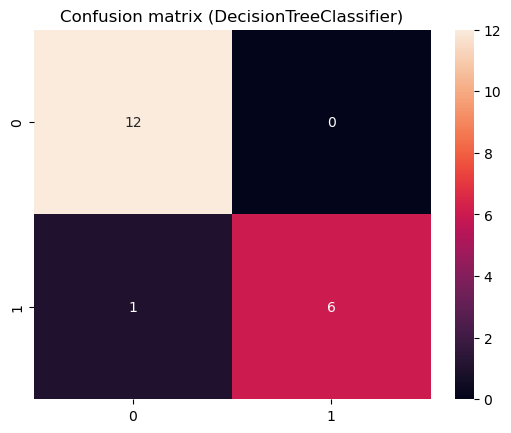

In [28]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True).set(title="Confusion matrix (DecisionTreeClassifier)")
acc = accuracy_score(y_test, y_pred)

In [29]:
print("Accuracy: ", acc)

Accuracy:  0.9473684210526315


In [30]:
!apt-get install graphviz

E: Nie udało się otworzyć pliku blokady /var/lib/dpkg/lock-frontend - open (13: Brak dostępu)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


[Text(0.375, 0.875, 'x[0] <= -0.623\ngini = 0.499\nsamples = 57\nvalue = [30, 27]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.5, 0.625, 'x[6] <= 0.5\ngini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(0.25, 0.375, 'x[0] <= -0.085\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(0.125, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.75, 0.375, 'x[3] <= 0.225\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

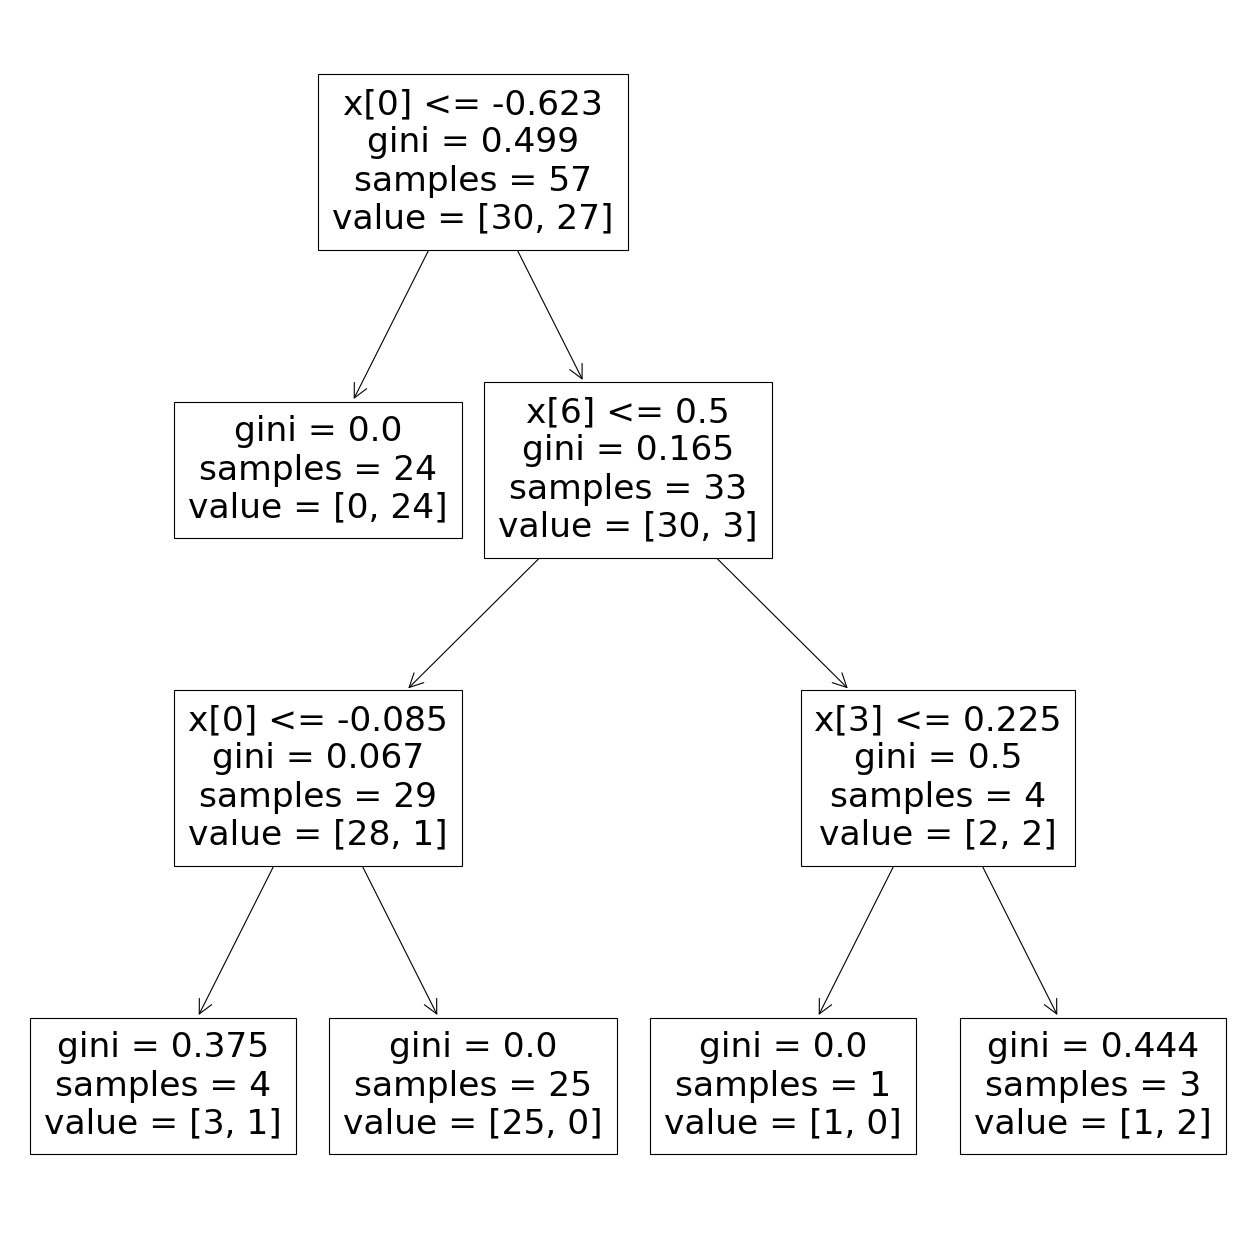

In [31]:
from sklearn import tree

plt.figure(figsize=(20,20), dpi= 80)
tree.plot_tree(clf)

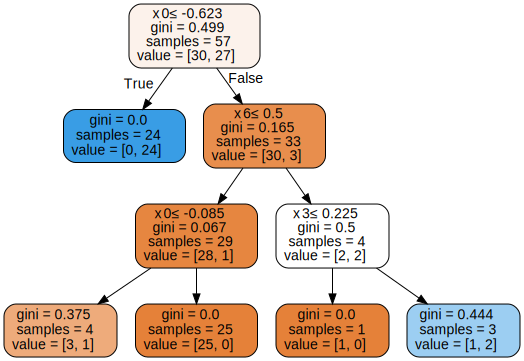

In [35]:
import graphviz

dot_data = tree.export_graphviz(clf,
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None,)
graph = graphviz.Source(dot_data)
graph


## SVM

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC(kernel='rbf', gamma=0.5, C=1)
clf1 = SVC(kernel='poly', degree=3)
clf2 = SVC(kernel='linear', C=0.5)

clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

In [38]:
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)

(0.8947368421052632, 0.8947368421052632, 0.8947368421052632)

In [40]:
f1_score(y_test, y_pred), f1_score(y_test, y_pred1), f1_score(y_test, y_pred2)

(0.8750000000000001, 0.8750000000000001, 0.8750000000000001)

In [41]:
scores = cross_val_score(clf, X, y, cv=10)
scores

array([1.        , 0.75      , 0.75      , 1.        , 1.        ,
       0.875     , 0.85714286, 0.71428571, 0.71428571, 0.85714286])

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

[Text(0.5, 1.0, 'Confusion matrix (RBF)')]

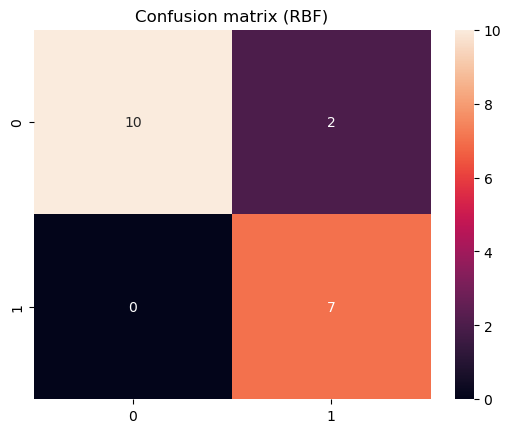

In [43]:
sn.heatmap(cm, annot=True).set(title='Confusion matrix (RBF)')

<Axes: >

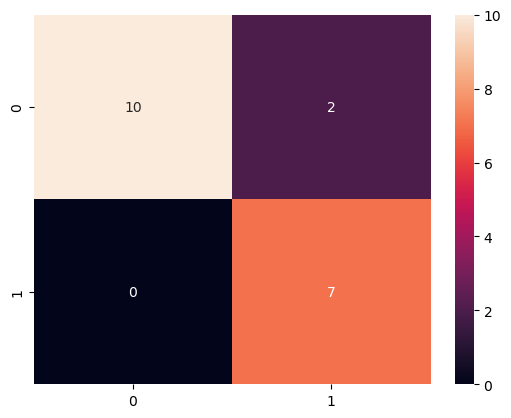

In [44]:
sn.heatmap(cm1, annot=True)

<Axes: >

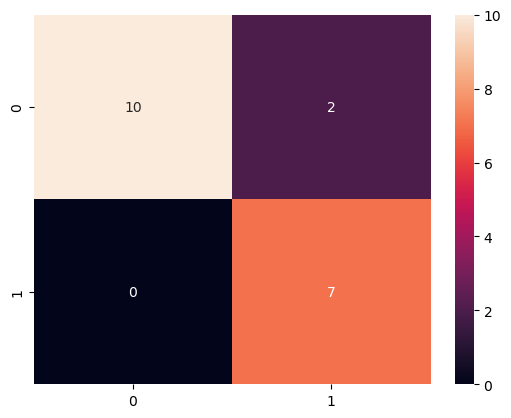

In [45]:
sn.heatmap(cm2, annot=True)

## kNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9b3375ce00>
Traceback (most recent call last):
  File "/home/staszek/anaconda3/envs/ml/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/staszek/anaconda3/envs/ml/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/staszek/anaconda3/envs/ml/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/staszek/anaconda3/envs/ml/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
Attribute

Text(0, 0.5, 'Accuracy Score')

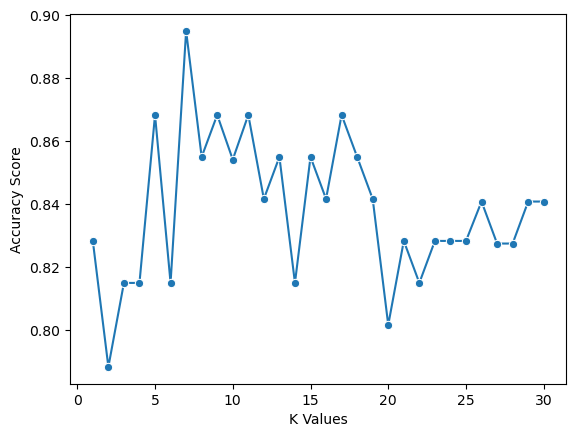

In [48]:
sn.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [49]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

In [50]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy k = 5:", accuracy1)
print("Accuracy k = 7:", accuracy2)

Accuracy k = 5: 0.8421052631578947
Accuracy k = 7: 0.8947368421052632


In [51]:
f1_score(y_test, y_pred1),  f1_score(y_test, y_pred2)

(0.8235294117647058, 0.8750000000000001)

0.8421052631578947

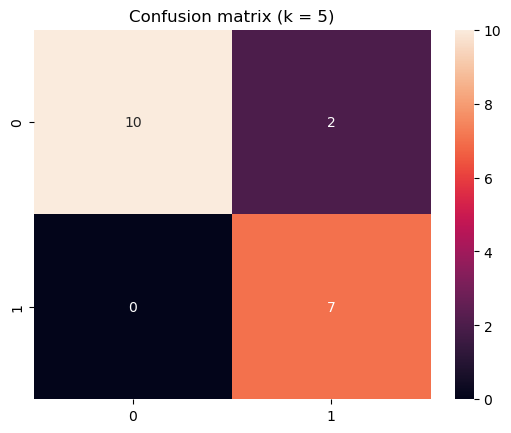

In [52]:
cm1 = confusion_matrix(y_test, y_pred1)
sn.heatmap(cm, annot=True).set(title='Confusion matrix (k = 5)')
accuracy_score(y_test, y_pred1)

0.8947368421052632

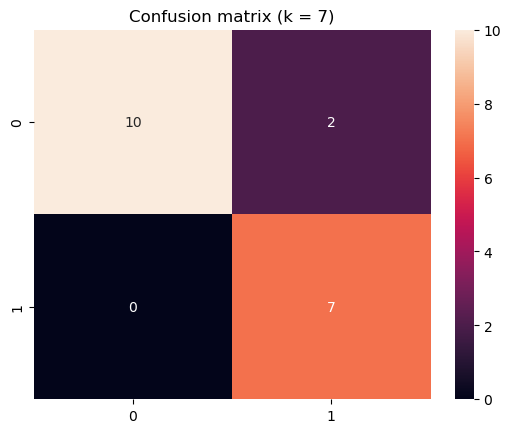

In [53]:
cm2 = confusion_matrix(y_test, y_pred2)
sn.heatmap(cm2, annot=True).set(title='Confusion matrix (k = 7)')
accuracy_score(y_test, y_pred2)